# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2201 Идрисов М.И. 
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [18]:
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
# генерация матрицы смежности со случайными весами
import random

inc = [
    [ 1,  0,  0,  0, -1,  0,  0,  0,  -1,  1],
    [-1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0, -1,  1,  0,  1,  0,  0,  0,  0,  0],
    [ 0,  0, -1,  1,  0, -1,  0,  0,  0,  0],
    [ 0,  0,  0, -1,  0,  1,  1,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0, -1,  1,  0, -1],
    [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0]
]

inf = float('inf')
adj = [[inf for _ in range(7)] for _ in range(7)]

for i in range(len(adj)):
    adj[i][i]=0

for col in range(len(inc[0])):
    nodes = [i for i in range(len(inc)) if inc[i][col] != 0]
    if len(nodes) == 2:
        i, j = nodes
        weight = random.randint(10, 99)
        if inc[i][col]==1:
            adj[i][j] = weight
        else:
            adj[j][i] = weight  

for row in adj:
    print(row)


[0, 64, inf, inf, inf, 75, inf]
[inf, 0, 27, inf, inf, inf, inf]
[11, inf, 0, 18, inf, inf, inf]
[inf, inf, inf, 0, 32, inf, inf]
[inf, inf, inf, 35, 0, 71, inf]
[inf, inf, inf, inf, inf, 0, 47]
[63, inf, inf, inf, inf, inf, 0]


In [20]:
# класс узла
class Node:
    value : int 
    
    def __init__(self, value) -> None:
        self.value = value
        self.edges=[]
        self.parents=dict()

# класс ребра
class Edge:
    nextNode : Node
    weight : int

    def __init__(self, nextNode, weight) -> None:
        self.nextNode = nextNode
        self.weight = weight

# добавляет или возвращает узел
def addOrGetNode(graph,value) -> Node:
    if (value==-1):
        return None
    if (value in graph.keys()):
        return graph[value]
    node=Node(value)
    graph[value]=node
    return node

# создает граф
def createGraph(graphData):
    graph=dict()
    for row in graphData:
        node = addOrGetNode(graph,row[0])
        nextNode= addOrGetNode(graph, row[1])
        if (nextNode==None):
            continue
        edge=Edge(nextNode,row[2])
        node.edges.append(edge)
        nextNode.parents[node]=edge
    return graph

# для матрицы смежности
def adjGraph(graphData):
    graph = dict()
    for ind,row in enumerate(graphData):
        node = addOrGetNode(graph, ind)
        for k,value in enumerate(row):
            if value==0 or value == inf:
                continue
            nextNode=addOrGetNode(graph, k)
            if (nextNode==None):
                continue
            edge=Edge(nextNode,value)
            node.edges.append(edge)
            nextNode.parents[node]=edge
    return graph

# для матрицы инцидентности
def incGraph(inc):
    graph = {}
    for col in range(len(inc[0])):  # по столбцам матрицы
        start_node = None
        end_node = None
        for row in range(len(inc)):  # по строкам матрицы
            if inc[row][col] == 1:
                start_node = addOrGetNode(graph, row)
            elif inc[row][col] == -1:
                end_node = addOrGetNode(graph, row)
        
        if start_node and end_node:
            edge = Edge(end_node, 1)
            start_node.edges.append(edge)
            end_node.parents[start_node.value] = edge

    return graph

def visualize_graph(graph, path=[]):
    G = nx.DiGraph()
    for node in graph:
        for edge in graph[node].edges:
            G.add_edge(node, edge.nextNode.value, weight=edge.weight)

    pos = nx.spring_layout(G, seed=1)
    nx.draw(G, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path!=[]:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    plt.show()



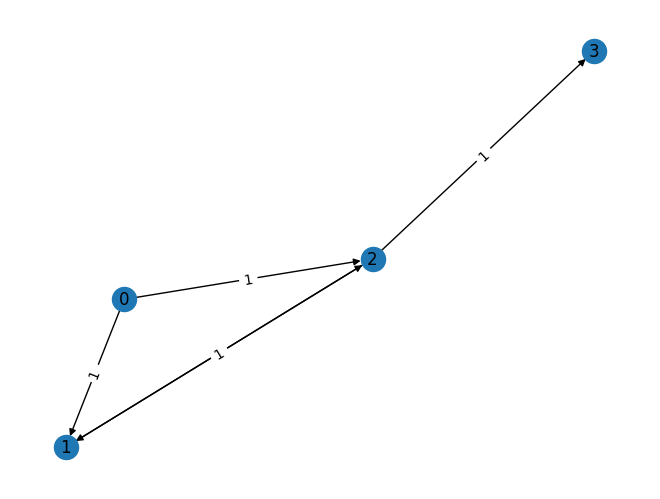

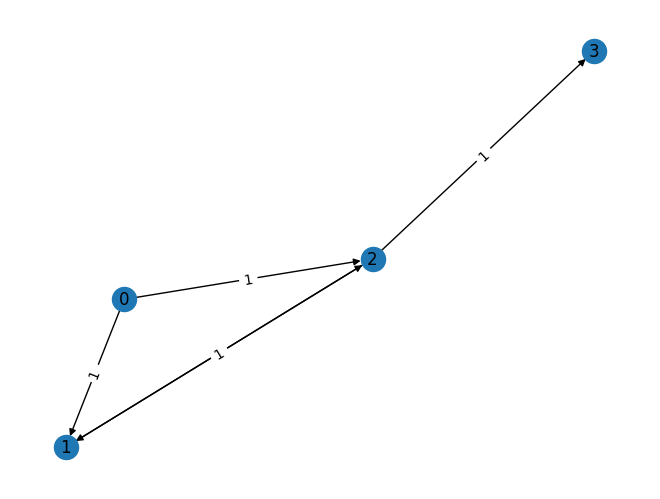

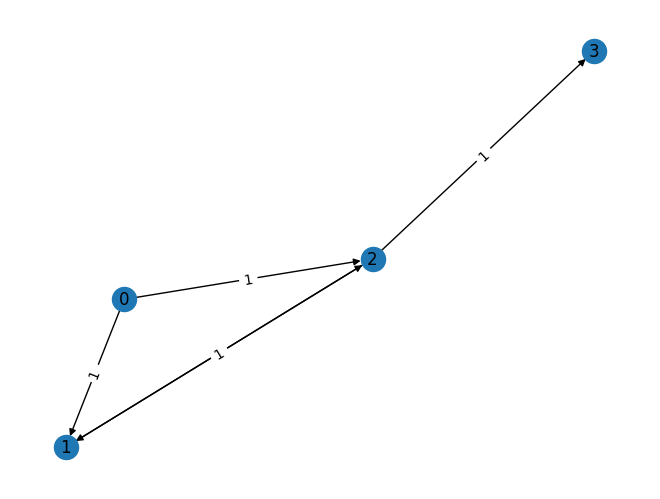

In [21]:
# тестирую с разными вводами...

graphData=[
    [0,1,1],
    [0,2,1],
    [1,2,1],
    [2,1,1],
    [2,3,1]
]
graph=createGraph(graphData)
visualize_graph(graph)

adj = [
    [0,1,1,0],
    [0,0,1,0],
    [0,1,0,1],
    [0,0,0,0],
]
graph=adjGraph(adj)
visualize_graph(graph)

inc =[
    [ 1,  1, 0,  0, 0],
    [-1,  0, 1, -1, 0],
    [ 0, -1,-1,  1, 1],
    [ 0,  0, 0,  0,-1],
]
graph=incGraph(inc)
visualize_graph(graph)

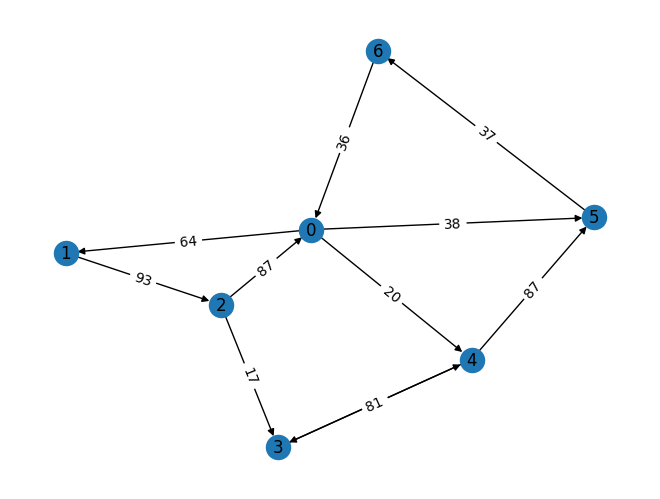

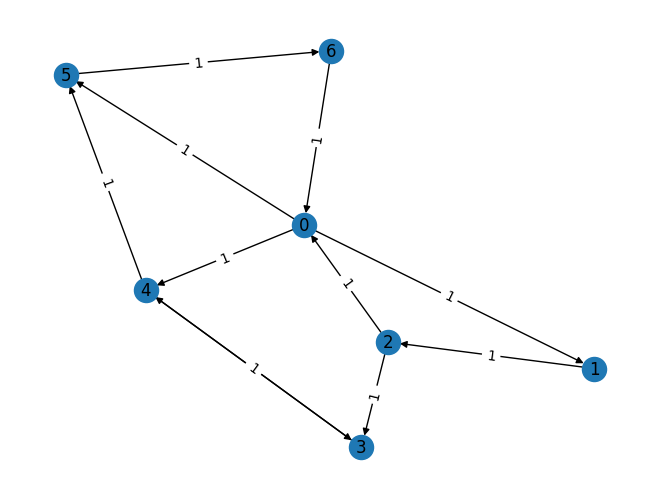

In [22]:
adj = [
    [0, 64, inf, inf, 20, 38, inf],
    [inf, 0, 93, inf, inf, inf, inf],
    [87, inf, 0, 17, inf, inf, inf],
    [inf, inf, inf, 0, 81, inf, inf],
    [inf, inf, inf, 81, 0, 87, inf],
    [inf, inf, inf, inf, inf, 0, 37],
    [36, inf, inf, inf, inf, inf, 0],
]
adj_graph=adjGraph(adj)
visualize_graph(adj_graph)


inc = [
    [ 1,  0,  0,  0, -1,  0,  0,  0,  -1,  1,1],
    [-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,0],
    [ 0, -1,  1,  0,  1,  0,  0,  0,  0,  0,0],
    [ 0,  0, -1,  1,  0, -1,  0,  0,  0,  0,0],
    [ 0,  0,  0, -1,  0,  1,  1,  0,  0,  0,-1],
    [ 0,  0,  0,  0,  0,  0, -1,  1,  0, -1,0],
    [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,0]
]


inc_graph=incGraph(inc)
visualize_graph(inc_graph)

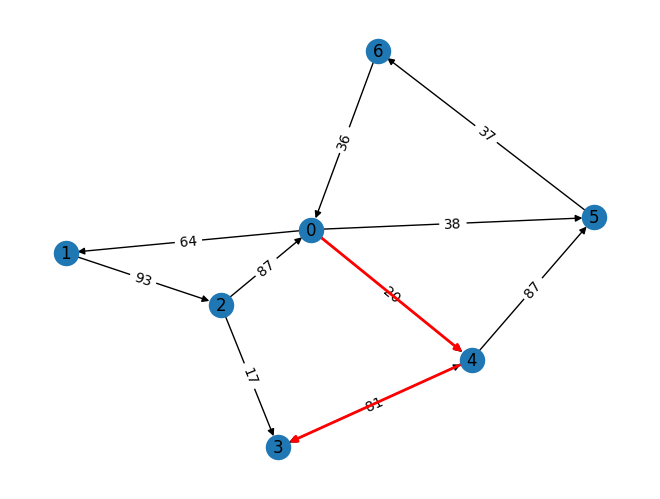

Кратчайший путь от узла 0 до узла 3: [0, 4, 3]
Длина пути: 101


In [23]:
import heapq

def dijkstra(adj_matrix, start):
    n = len(adj_matrix)
    distances = [float('inf')] * n
    distances[start] = 0
    predecessors = [-1] * n
    visited = [False] * n
    pq = [(0, start)]

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)
        if visited[current_vertex]:
            continue
        visited[current_vertex] = True

        for neighbor, weight in enumerate(adj_matrix[current_vertex]):
            if weight > 0 and not visited[neighbor]:
                new_distance = current_distance + weight
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = current_vertex
                    heapq.heappush(pq, (new_distance, neighbor))

    return distances, predecessors

def reconstruct_path(predecessors, start, end):
    path = []
    current = end
    while current != start:
        if current == -1:
            return None  # Путь не существует
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()
    return path

# Пример использования
start_node = 0
end_node = 3
distances, predecessors = dijkstra(adj, start_node)
path = reconstruct_path(predecessors, start_node, end_node)

# visualize_graph(adj_graph)
visualize_graph	(adj_graph,path=path)

print(f"Кратчайший путь от узла {start_node} до узла {end_node}: {path}")
print(f"Длина пути: {distances[end_node]}")

In [24]:
print(distances)

[0, 64, 157, 101, 20, 38, 75]


### Вывод